In [1]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cropped_Wild016.tif')
original_img = img[:,:,0]
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)


ablur = cv2.blur(original_img,(32, 32))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,161,4) 

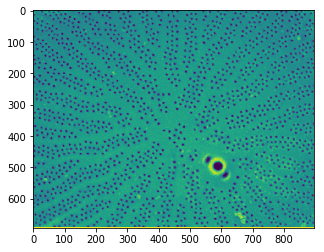

In [2]:
#dilated SKELETON
from skimage.morphology import dilation
dilationimg = dilation(original_img)
ax = plt.subplot()
ax.imshow(dilationimg)

In [3]:
dilablur = cv2.blur(dilationimg,(30, 30))
dilatedthreshold = cv2.adaptiveThreshold(dilablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,151,4) 

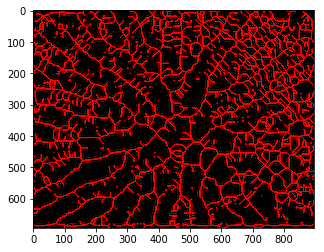

In [4]:
#DILATED SKELETON
from skimage.morphology import skeletonize
dilatedskeleton = skeletonize(dilatedthreshold)
ax = plt.subplot()
ax.imshow(dilatedskeleton, cmap=red2, interpolation='sinc')

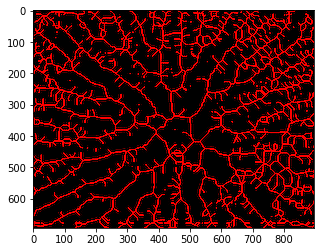

In [5]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


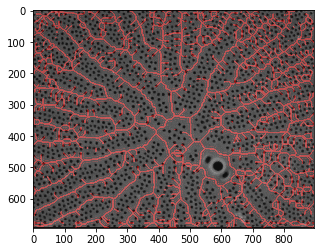

In [6]:
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc', alpha=.42) 